In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import mglearn
import numpy as np
import pandas as pd

In [2]:
cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [82]:
#### feature를 컬럼으로 DataFrame 생성
data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [13]:
## train_test_split 함수를 이용해서 cancer와 target을 섞는다..비율은 8:2
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=0) 

## RandomForestClassifier 모델 생성. 결정트리갯수는 100
forest1 = RandomForestClassifier(n_estimators=100, random_state=0)

## 학습시킴
forest1.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [14]:
## Training DataSet Accuracy, Test DataSet Accuracy를 출력함
score_train = forest1.score(X_train, y_train) 
score_test = forest1.score(X_test, y_test)

print('Training DataSet Accuracy {:.3f}'.format(score_train))
print('Test DataSet Accuracy {:.3f}'.format(score_test))

Training DataSet Accuracy 1.000
Test DataSet Accuracy 0.965


In [19]:
## 하이퍼 파라미터값을 지정
## max_features=2
## max_depth=5
## 오버핏팅이 다소 줄어들고 정확도가 조금 올라가는 것을 확인하자

forest2 = RandomForestClassifier(n_estimators=100, max_features=2, max_depth=5, random_state=0)
forest2.fit(X_train, y_train)

score_train = forest2.score(X_train, y_train) 
score_test = forest2.score(X_test, y_test)

print('Training DataSet Accuracy {:}'.format(score_train))
print('Test DataSet Accuracy {:}'.format(score_test))

Training DataSet Accuracy 0.9934065934065934
Test DataSet Accuracy 0.9473684210526315


In [20]:
print('특성 중요도:\n{}'.format(forest2.feature_importances_))

특성 중요도:
[0.0298545  0.01797476 0.07681015 0.05198761 0.00968512 0.03329763
 0.07853538 0.07634576 0.00555884 0.00636833 0.04089992 0.0044979
 0.02520987 0.04738528 0.00336297 0.00893158 0.02531315 0.00989085
 0.00524717 0.00527032 0.06265836 0.02187096 0.12819998 0.0499851
 0.01395928 0.03123286 0.04236133 0.06994343 0.00843751 0.00892408]


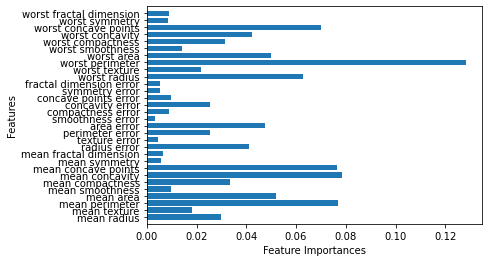

In [88]:
## 특성 중요도를 시각화하자.
def plot_feature_importances_cancer(model):
    n_feature = cancer.data.shape[1]
    plt.barh(range(n_feature), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_feature), cancer.feature_names) #y측의 눈금조절
    plt.xlabel('Feature Importances')
    plt.ylabel('Features')
    plt.ylim(-1, n_feature)
    
plot_feature_importances_cancer(forest2)

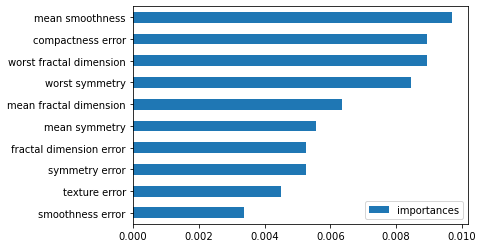

In [81]:
# 중요도 순으로 졍렬해서 시각화
df1 = pd.DataFrame({
    'importances':forest2.feature_importances_},
    index=list(cancer.feature_names)
    )
df1.sort_values(by='importances').head(10).plot(kind='barh')

In [87]:
# max_depths = [1,3,4,6,10,15] 값이 변화됨에 따라서 정확도가 커지는 관계를 출력해보자

max_depths = [1,3,4,6,10,15]

for i in range(0,6):
    forest3 = RandomForestClassifier(n_estimators=100, max_features=2, max_depth=max_depths[i], random_state=0)
    forest3.fit(X_train, y_train)
    score_test = forest3.score(X_test, y_test)
    print('max_depth={:} 정확도 : {:.4f}'.format(max_depths[i], score_test))

max_depth=1 정확도 : 0.9298
max_depth=3 정확도 : 0.9386
max_depth=4 정확도 : 0.9474
max_depth=6 정확도 : 0.9561
max_depth=10 정확도 : 0.9561
max_depth=15 정확도 : 0.9561
